In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### Data Loading and Filtering

In [656]:
df = pd.read_csv("../zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] > 50
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,True
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,True


In [657]:
Y = df['Passed'].values
X_df = df.drop(columns=['Passed'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X_df = X_standardized.values

In [658]:
X = X_df
X = np.column_stack((
    np.ones(len(df)),
    X
))

In [659]:
# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Cost Function

In [660]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.log(y_hat))
    neg_component = np.sum((1 - Y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

#### Optimization

In [661]:
def compute_gradients(X, Y, y_hat):
    m = len(Y)

    """
    beta0, beta1    
    """

    beta = (1 / m) * X.T.dot(y_hat - Y)

    return beta

In [662]:
beta = np.random.randn(8)
print(f"beta values : {beta}")

lr = 0.01
n_iter = 1000

beta values : [ 1.12982256  1.68598072 -1.09633741 -0.01506311 -1.46407394 -0.79636191
 -0.1182765   0.30348047]


In [663]:
cost_history = []
for i in range(n_iter):
    """
    Z = beta.T.X = beta0 + beta1.x1
    Y_hat = sigmoid(Z)
    """
    z = X.dot(beta)
    y_hat = sigmoid(z)

    gradient = compute_gradients(X, Y, y_hat)

    beta = beta - lr * gradient

    cost = compute_cost(y_hat, Y)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration : {i}: Beta : {beta} :Cost : {cost:.4f}")

Iteration : 0: Beta : [ 1.12929959  1.68278546 -1.09436617 -0.01056689 -1.46133921 -0.79650651
 -0.11718914  0.30287277] :Cost : 1.5455
Iteration : 100: Beta : [ 1.07322086  1.37569104 -0.90339002  0.40947467 -1.20130685 -0.80184552
 -0.01954676  0.24271976] :Cost : 1.1531
Iteration : 200: Beta : [ 1.0116523   1.10402797 -0.72629681  0.76603056 -0.97422418 -0.78859869
  0.05691873  0.18505398] :Cost : 0.8547
Iteration : 300: Beta : [ 0.95061617  0.87747004 -0.56605461  1.05814268 -0.78603808 -0.75861805
  0.11572593  0.13089896] :Cost : 0.6447
Iteration : 400: Beta : [ 0.89621887  0.69488969 -0.42507973  1.29326956 -0.636515   -0.71788105
  0.16111829  0.08161127] :Cost : 0.5037
Iteration : 500: Beta : [ 0.85169513  0.54895612 -0.30366119  1.4829514  -0.52073056 -0.67379481
  0.19649079  0.03907318] :Cost : 0.4107
Iteration : 600: Beta : [ 0.81744299  0.43178943 -0.20022936  1.6382279  -0.43236596 -0.63165043
  0.22474405  0.00421291] :Cost : 0.3490
Iteration : 700: Beta : [ 0.79226631

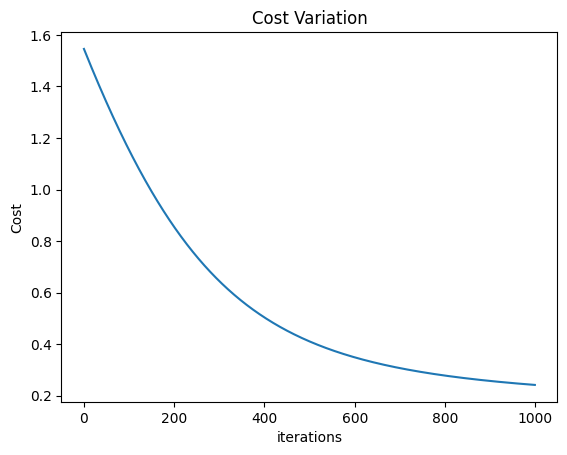

In [664]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Evaluation Matrics

In [665]:
# finding probabilty
z = X.dot(beta)
Y_proba = sigmoid(z)
Y_proba

array([0.67032333, 0.98937553, 0.96264705, 0.18054489, 0.97675682,
       0.94056167, 0.40889139, 0.51744027, 0.39457971, 0.21927244,
       0.92809306, 0.26634141, 0.17473743, 0.80250135, 0.84386844,
       0.15981644, 0.97024648, 0.11565408, 0.63394625, 0.9838388 ,
       0.75500422, 0.15482495, 0.11734263, 0.96960538, 0.98153529,
       0.13663046, 0.12267485, 0.23848894, 0.56122285, 0.43937252,
       0.99297835, 0.20957827, 0.09102945, 0.93129248, 0.94783183,
       0.75182376, 0.0981197 , 0.21422173, 0.12893639, 0.89779934,
       0.89368117, 0.95240443, 0.67827482, 0.93986181, 0.53326011,
       0.80537424, 0.23744317, 0.07126619, 0.90366093, 0.22183629,
       0.93688457, 0.1692496 , 0.67103199, 0.99226901, 0.85834561,
       0.94472061, 0.9203407 , 0.87144959, 0.90457227, 0.97592827,
       0.01672703, 0.41685624, 0.29513746, 0.9785205 , 0.23235849,
       0.5483181 , 0.85519338, 0.76749646, 0.98611459, 0.17457025,
       0.11835356, 0.63499909])

In [666]:
def compute_confusion_matrix(Y,Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array([
                [TN,FP]
                ,[FN,TP]
                ],
                dtype=int
                )

In [667]:
z = X.dot(beta)
Y_hat = sigmoid(z) > 0.5
Y_hat

array([ True,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True,  True, False, False,  True])

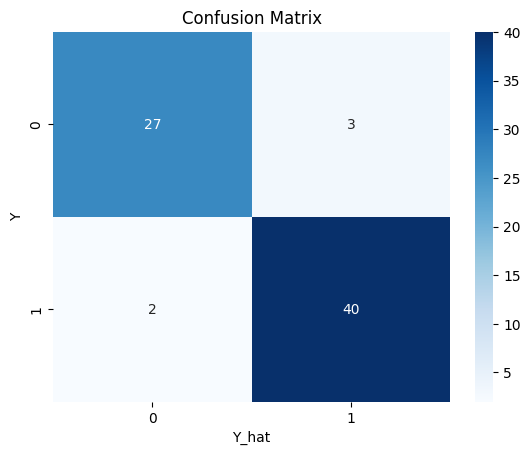

In [668]:
cm = compute_confusion_matrix(Y,Y_hat)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

In [669]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP/(TP+FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP +FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm)
    return 2 * p * r / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN) / (TP + TN + FP + FN)

In [670]:
cm = compute_confusion_matrix(Y, Y_hat) 
p = precision_score(cm)
r = recall_score(cm) 
f1 = f1_score(cm)
acc = accuracy(cm)

print(f"Precision : {p}")
print(f"Recall : {r}")
print(f"F1 Score : {f1}")
print(f"Accuracy : {acc}")

Precision : 0.9302325581395349
Recall : 0.9523809523809523
F1 Score : 0.9411764705882352
Accuracy : 0.9305555555555556


In [671]:
def roc_curve(Y,Y_proba):
    thresholds = np.linspace(1,0,200)

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)
        
        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)



In [672]:
tpr, fpr, _ = roc_curve(Y, Y_proba)

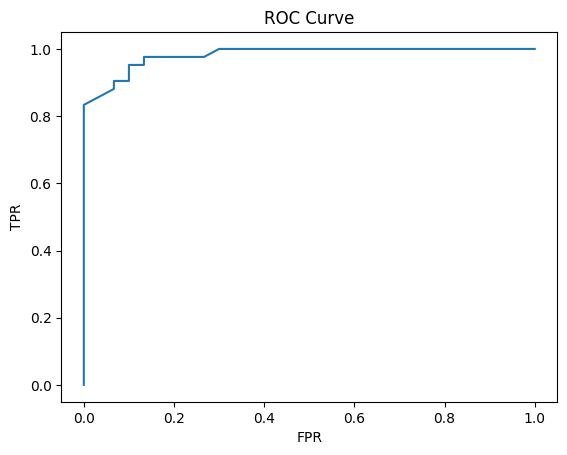

In [673]:
plt.plot(fpr, tpr, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [674]:
auc = np.trapezoid(tpr, fpr)
print(f"AUC: {auc}")

AUC: 0.9821428571428572


#### Comapring with Sklearn

In [675]:
logr = LogisticRegression(max_iter=1000)
logr.fit(X_df,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [676]:
Y_hat = logr.predict(X_df)
Y_hat

array([ True,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True,  True, False, False,  True])

In [677]:
Y_proba = logr.predict_proba(X_df)
Y_proba = Y_proba[:,1]
Y_proba

array([0.50384982, 0.99762595, 0.98734248, 0.07951925, 0.98972957,
       0.99280403, 0.3202909 , 0.82423391, 0.25603656, 0.20121775,
       0.90809108, 0.0917792 , 0.07757741, 0.7614875 , 0.79392758,
       0.02059986, 0.99864118, 0.04281834, 0.32204056, 0.99699761,
       0.86126897, 0.08688325, 0.05038017, 0.99632933, 0.99585951,
       0.09141957, 0.13457323, 0.10688345, 0.64720946, 0.12020086,
       0.99793534, 0.25651591, 0.02165964, 0.94888962, 0.97352531,
       0.90230445, 0.02708323, 0.15825908, 0.13410639, 0.96552526,
       0.93212438, 0.95448043, 0.8406039 , 0.98763089, 0.44458694,
       0.75783356, 0.4754949 , 0.07993205, 0.92642731, 0.08973314,
       0.9646933 , 0.08961897, 0.7129916 , 0.99767325, 0.96406321,
       0.99505528, 0.9481983 , 0.91595395, 0.95459867, 0.98725066,
       0.00567935, 0.46804703, 0.40284303, 0.99473923, 0.12805777,
       0.7521613 , 0.97768752, 0.74711399, 0.99531018, 0.08879487,
       0.02358394, 0.75324292])